# Importando base de dados

In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv('tips_atualizado.csv')

In [7]:
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


# Tradução

In [8]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [9]:
gorjetas = dados.rename(columns={'total_bill': 'valor_da_conta',
                      'tip': 'gorjeta', 
                      'dessert': 'sobremesa',
                      'day': 'dia_da_semana', 
                      'time': 'hora_do_dia', 
                      'size': 'total_de_pessoas'})

In [10]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [11]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
sim_nao = {'No': 'Não', 'Yes': 'Sim'}

In [14]:
gorjetas['sobremesa'].map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [15]:
# atribuindo a variável sim_não nos dados de sobremesa do DF
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)

In [16]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [17]:
# encontrando os valores únicos da coluna 'dia_da_semana'
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [18]:
dias = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri':'Sexta'}

In [19]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(dias)

In [20]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [21]:
gorjetas['hora_do_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [22]:
hora = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [23]:
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(hora)

In [24]:
gorjetas['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

# Importando o Seaborn

In [25]:
!pip install seaborn

In [26]:
import seaborn as sns

# Análise I - Valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

[Text(0, 0.5, 'Valor da Gorjeta')]

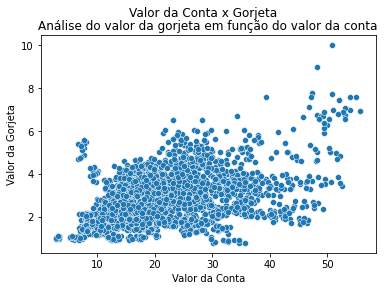

In [28]:
# criando um gráfico de dispersão. Eixo X com o valor da conta e a gorjeta no Eixo Y.
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
# incluindo o subtítulo
valor_gorjeta.figure.suptitle('Valor da Conta x Gorjeta')
# incluindo o título no gráfico
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
# alterando o título do eixo X
valor_gorjeta.set(xlabel='Valor da Conta')
# alterando o título do eixo Y
valor_gorjeta.set(ylabel='Valor da Gorjeta')

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [29]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\n')
print(f'Registros não nulos')
# conta quantos valores contém em cada coluna da BD
gorjetas.count() 

A base de dados contém 3416 registros

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## Salvando o gráfico em .png

In [30]:
# criando uma variável para o gráfico
grafico_dispersao_valor_conta_x_gorjeta = valor_gorjeta.get_figure()
# Salvando  o gráfico em .png
grafico_dispersao_valor_conta_x_gorjeta.savefig('grafico_dispersao_valor_conta_x_gorjeta.png')

## Criando o campo porcentagem

In [31]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [32]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [33]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [34]:
# arredondando os valores de porcentagem
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)

In [35]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,0.06
1,10.340000,1.660000,Não,Domingo,Jantar,3,0.16
2,21.010000,3.500000,Não,Domingo,Jantar,3,0.17
3,23.680000,3.310000,Não,Domingo,Jantar,2,0.14
4,24.590000,3.610000,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3,0.18
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06
3413,21.547132,1.733914,Sim,Sábado,Jantar,2,0.08
3414,18.966233,1.718951,Não,Sábado,Jantar,2,0.09


[Text(0, 0.5, 'Porcentagem da gorjeta'), Text(0.5, 0, 'Valor da Conta')]

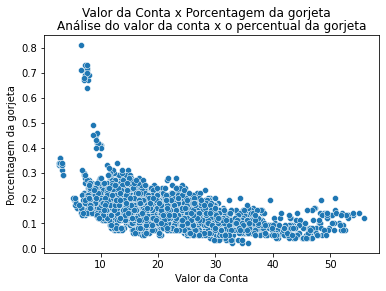

In [36]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)
porcentagem_conta.figure.suptitle('Valor da Conta x Porcentagem da gorjeta')
porcentagem_conta.set_title('Análise do valor da conta x o percentual da gorjeta')
porcentagem_conta.set(xlabel='Valor da Conta', ylabel='Porcentagem da gorjeta')

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

In [37]:
grafico_porcentagem_conta = porcentagem_conta.get_figure()
grafico_porcentagem_conta.savefig('grafico_porcentagem_conta_dispersao.png')

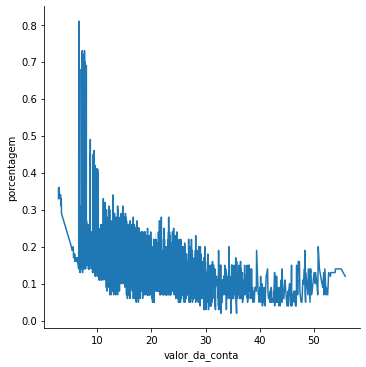

In [38]:
# criando um gráfico de linha. Utilizar a atributo kind='line'
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

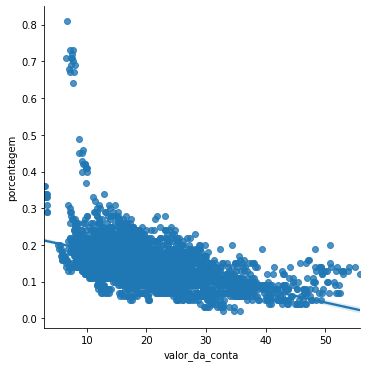

In [39]:
# indica a tendência da dispersão.
porcentagem_conta_dispersao_linha = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise II - Sobremesa

In [40]:
# analisando quem pediu sobremesa
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [41]:
# analisando quem não pediu sobremesa
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


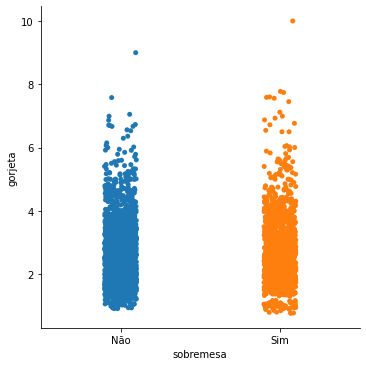

In [42]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

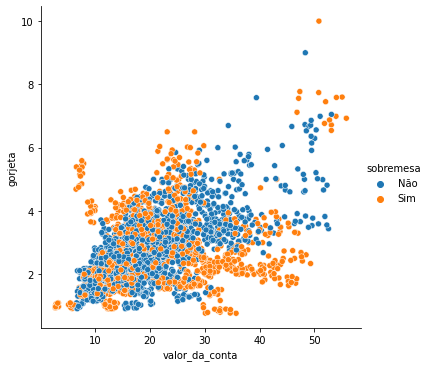

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

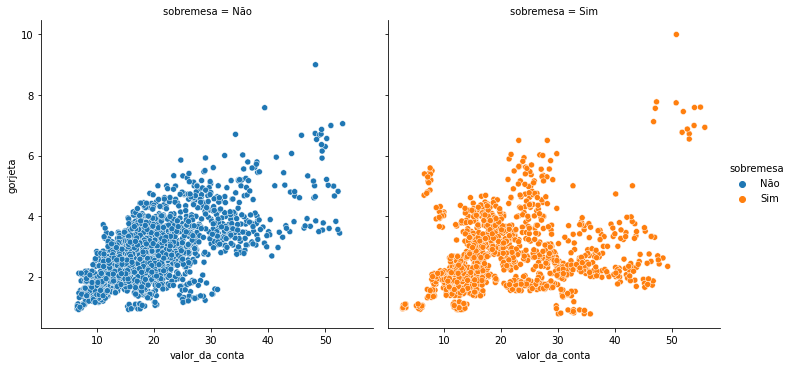

In [44]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa')

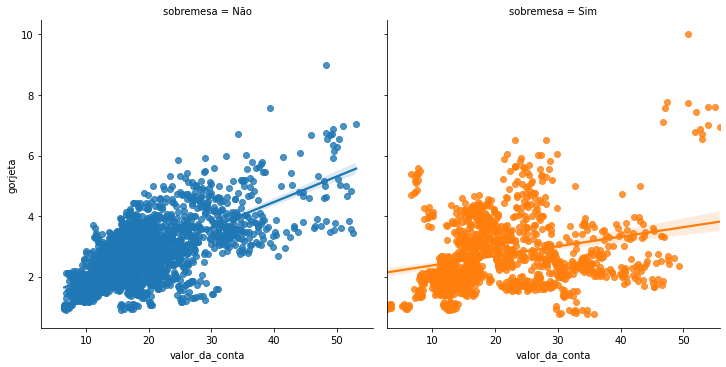

In [45]:
sns.lmplot(data=gorjetas, x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa')

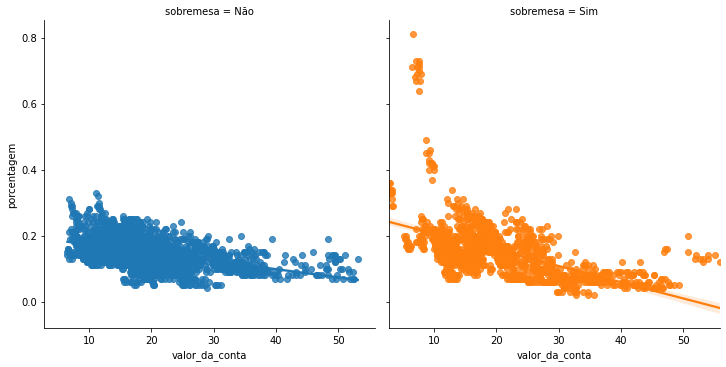

In [46]:
sns.lmplot(data=gorjetas, x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa')

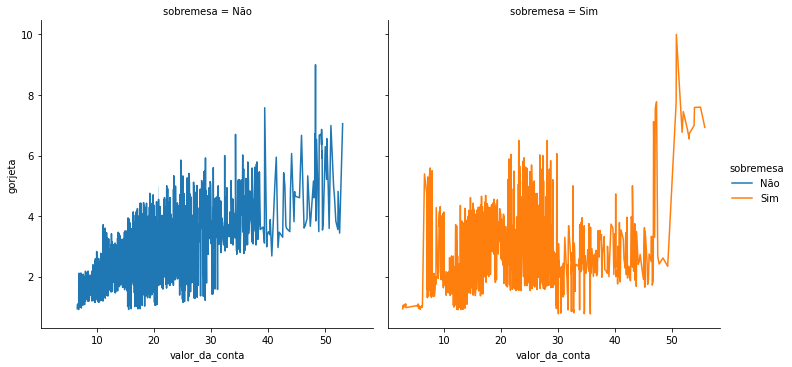

In [47]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line')

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e daqueles que não pediram.**

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [48]:
from scipy.stats import ranksums

In [49]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

In [50]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [51]:
r = ranksums(sobremesa, sem_sobremesa)

In [52]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.033144013617673405


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise III - Dias da semana

In [53]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [54]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

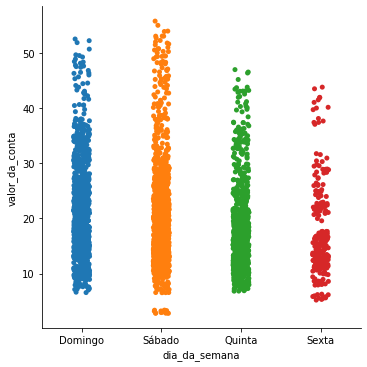

In [55]:
sns.catplot(data=gorjetas, x='dia_da_semana', y='valor_da_conta')

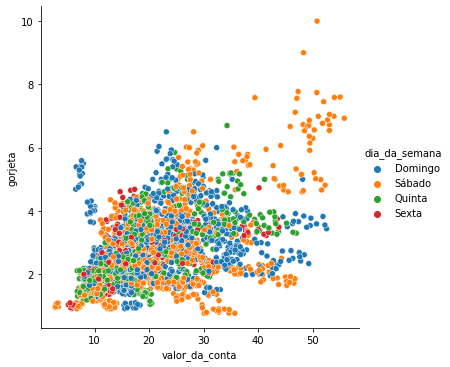

In [56]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='dia_da_semana')

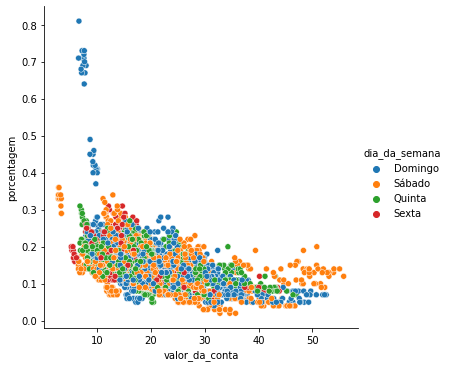

In [57]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='porcentagem', hue='dia_da_semana')

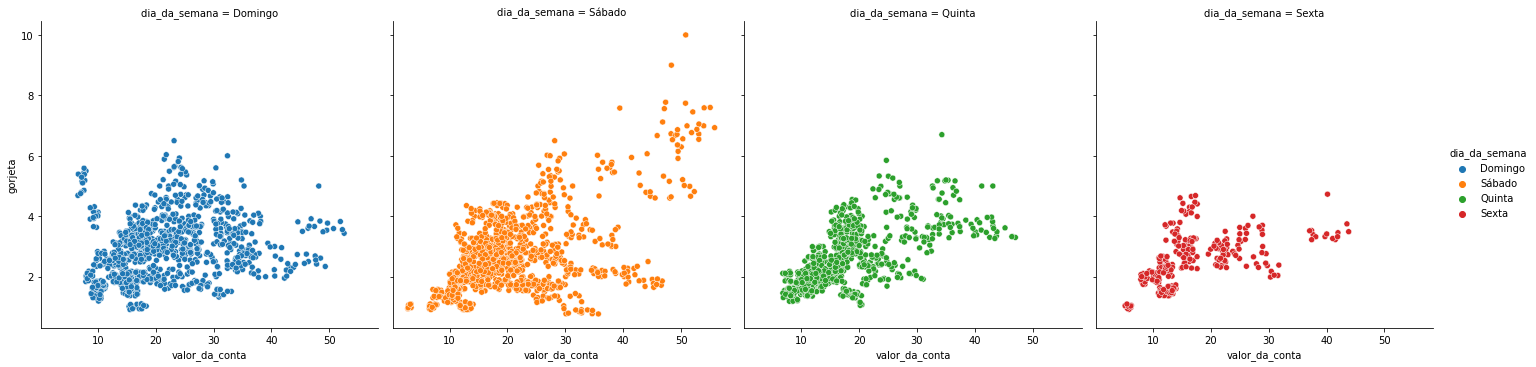

In [58]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

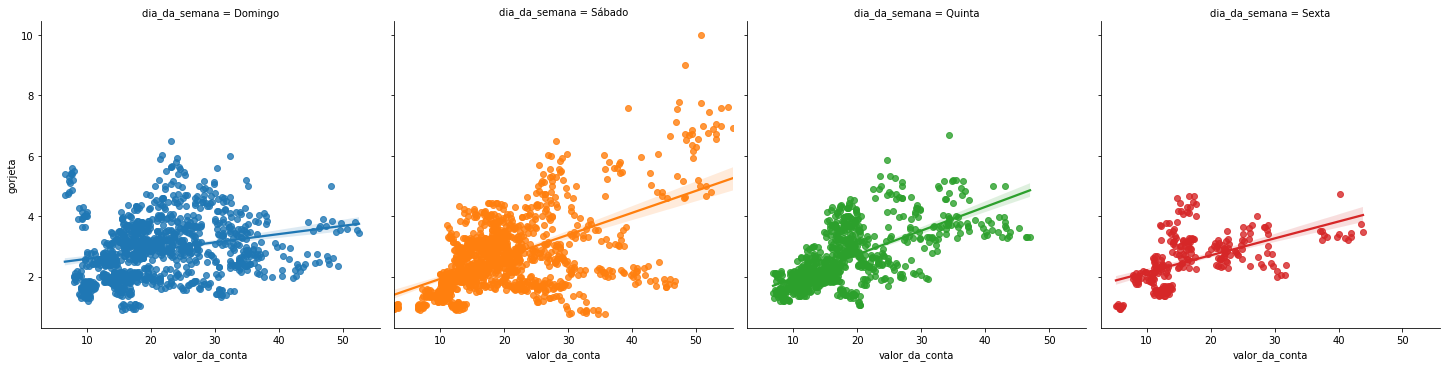

In [59]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

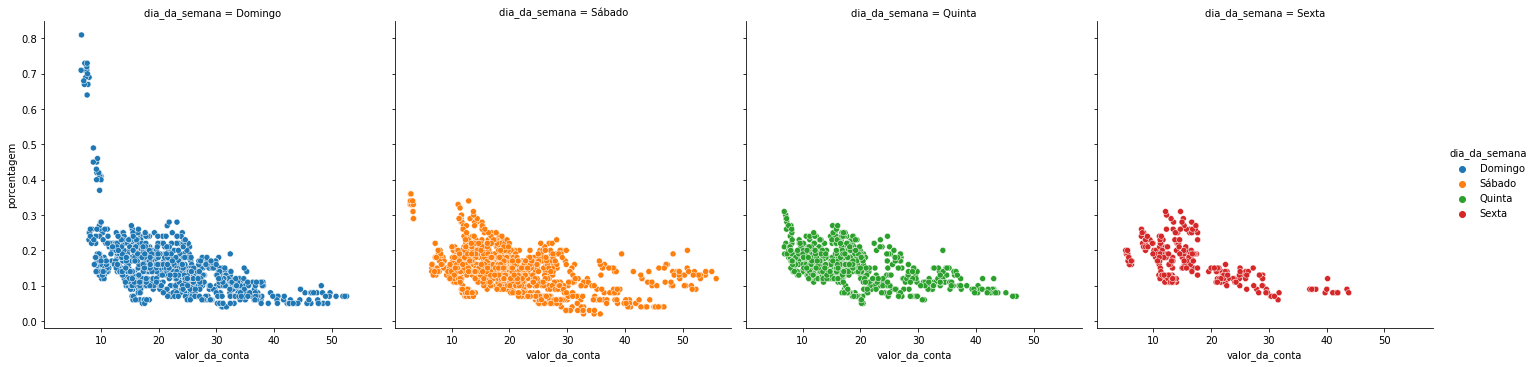

In [60]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

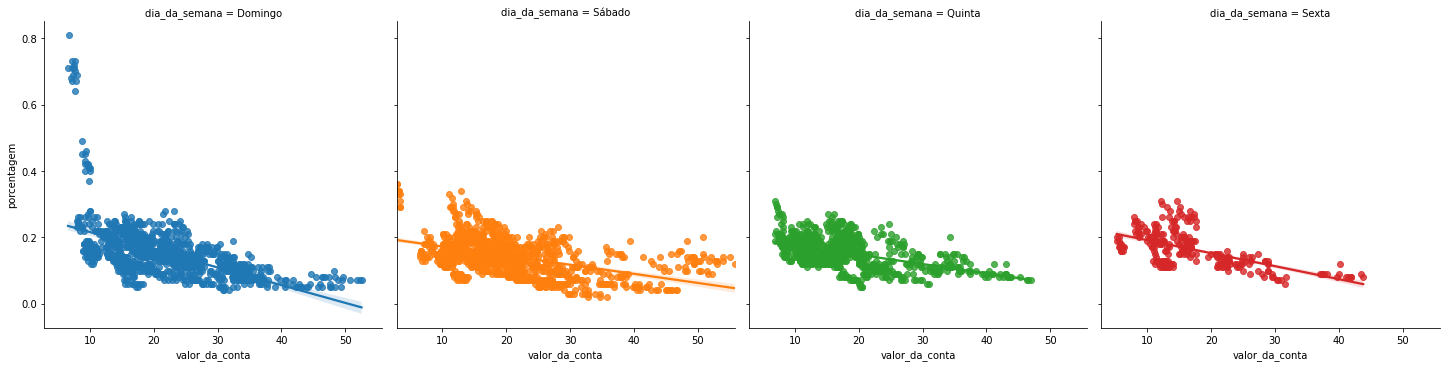

In [61]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [62]:
media_geral_gorjetas = gorjetas['gorjeta'].mean()

In [63]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.7111892140916103


In [64]:
# adquirindo o valor da média de todos os dias da semana.
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [65]:
print('Frequência dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no sábado e no domingo

In [66]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [67]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [68]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue:.6f}')

O valor do p-value é 0.000444


**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo

# Análise IV - Hora do dia

In [69]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [70]:
gorjetas['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

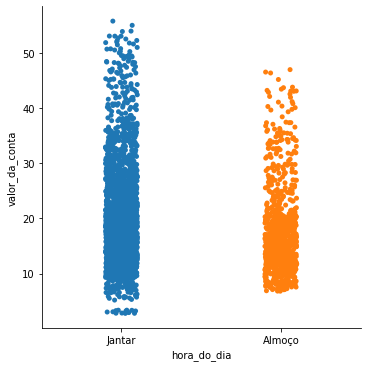

In [71]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


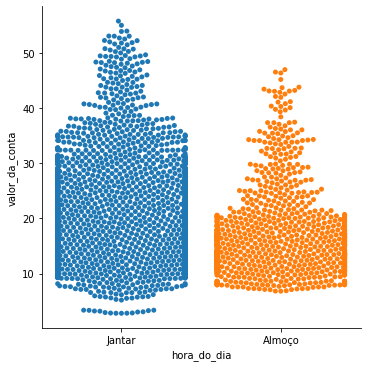

In [72]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

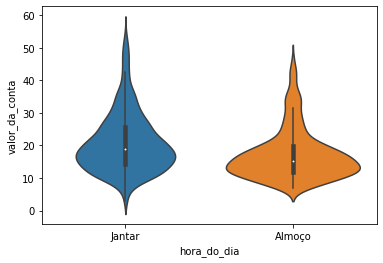

In [73]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

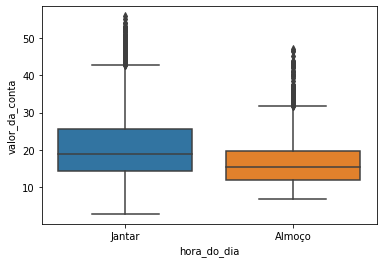

In [74]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [75]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


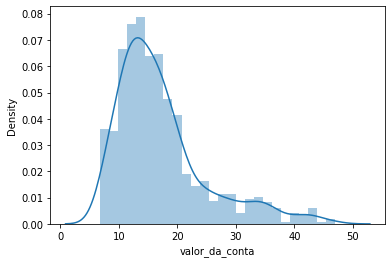

In [76]:
sns.distplot(almoco)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


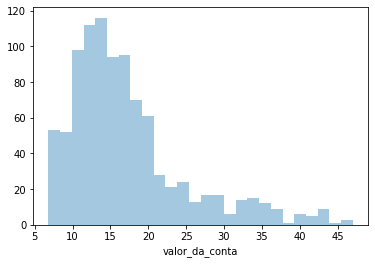

In [77]:
# criando um gráfico sem o gráfico atrás
sns.distplot(almoco, kde=False)

In [78]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


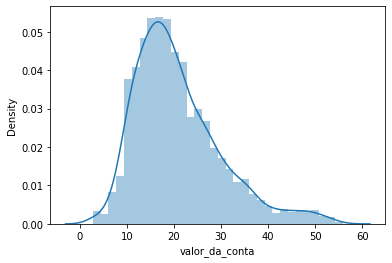

In [79]:
sns.distplot(jantar)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


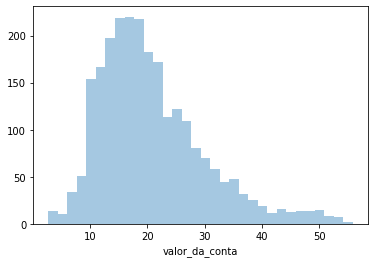

In [80]:
sns.distplot(jantar, kde=False)

In [81]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de hipótese

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no jantar e no almoço

**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no jantar e no almoço

In [82]:
r3 = ranksums(jantar, almoco)

In [83]:
print(f'O valor do p-value é de {r3.pvalue:.6f}')

O valor do p-value é de 0.000000


**H<sup>alt</sup>**
>A distribuição do valor da conta não é igual no jantar e no almoço

## Teste de hipótese 2

In [84]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [85]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [86]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [87]:
print(f'O valor do p-value é de {r4.pvalue:.6f}')

O valor do p-value é de 0.000000


**H<sup>null</sup>**
>A distribuição da taxa da gorjeta é igual no jantar e no almoço